# IMDB movie reviews sentiment classification dataset 

This code loads the IMDB dataset that's included with Keras and creates a dictionary mapping the words in all 50,000 reviews to integers indicating the words' relative frequency of occurrence. Each word is assigned a unique integer.

The reason the inner lists contain numbers rather than text is that you don't train a neural network with text; you train it with numbers.Specifically, you train it with tensors. In this case, each review is a 1-dimensional tensor (think of a 1-dimensional array) containing integers identifying the words contained in the review. 

In [1]:
#Each word is assigned a unique integer.
#The most common word is assigned the number 1, the second most common word is assigned the number 2, and so on.

from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Using TensorFlow backend.


17465344/17464789 [==============================] - 8s 0us/step


The variable named x_train is a list of 25,000 lists, each of which represents one movie review. (x_test is also a list of 25,000 lists representing 25,000 reviews. x_train will be used for training, while x_test will be used for testing.) 

In [2]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
# how the dictionary looks like?
#Dictionary mapping words to integers
imdb.get_word_index()

1646592/1641221 [==============================] - 3s 2us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
# reverse-encode
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In the output, ">" marks the beginning of the review, while "?" marks words that aren't among the most common 10,000 words in the dataset. These "unknown" words are represented by 2s in the list of integers representing a review. 

In [5]:
# When you train a neural network with collection of tensors, each tensor needs to be the same length. 
#Keras includes a function that takes a list of lists as input and converts the inner lists to a specified length by truncating them if necessary or padding them with 0s. 

from keras.preprocessing import sequence
max_review_length = 500                    # x_train and x_test to a length of 500 integers
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# Neural Networks to perform a sentiment analysis

In [6]:
#Creating a neural network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))      #The embedding layer essentially maps many-dimensional arrays containing integer word indexes into floating-point arrays containing fewer dimensions.
model.add(Flatten())                                                                          #Reshapes the output for input to the next layer
#the hidden layers
model.add(Dense(16, activation='relu'))                                                       #Fully connected layers with 16 neurons
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))                                                     #Fully connected layers with 1 neuron to predict one output,  a sentiment score from 0.0 to 1.0
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])              #Compiles the model by specifying paramrters like: loss-function, metrics and the optimizer
print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# Train the model
# epoch = 5 tells to keras to make 5 forward and backward passes through the model
# batch_size=128 tells to keras to use 128 training samples at a time to train the network. 
# NOTE : Smaller batch sizes sometimes increase accuracy. 

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 47s 2ms/step - loss: 0.4962 - accuracy: 0.7284 - val_loss: 0.2900 - val_accuracy: 0.8766
Epoch 2/5
25000/25000 [==============================] - 36s 1ms/step - loss: 0.1770 - accuracy: 0.9336 - val_loss: 0.2911 - val_accuracy: 0.8786
Epoch 3/5
25000/25000 [==============================] - 36s 1ms/step - loss: 0.0553 - accuracy: 0.9856 - val_loss: 0.3629 - val_accuracy: 0.8734
Epoch 4/5
25000/25000 [==============================] - 39s 2ms/step - loss: 0.0113 - accuracy: 0.9983 - val_loss: 0.4349 - val_accuracy: 0.8710
Epoch 5/5
25000/25000 [==============================] - 40s 2ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.4816 - val_accuracy: 0.8726


One indication that a model is overfitting is a growing discrepancy between the training accuracy and the validation accuracy

[]

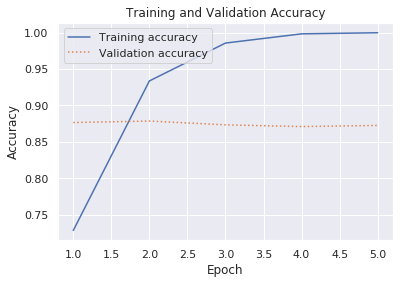

In [9]:
# visualize the changes in training and validation accuracy as training progress
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

This plot indicates that the training accuracy is bigger than the vaalidation accuracy so that there is overfitting for that reason we have to perform a regularization over the model, in order the model can be more simple

Another way to check for overfitting is to compare training loss to validation loss as training proceeds. Where for a given epoch, training loss, much lower than validation loss, can be evidence of overfitting.

[]

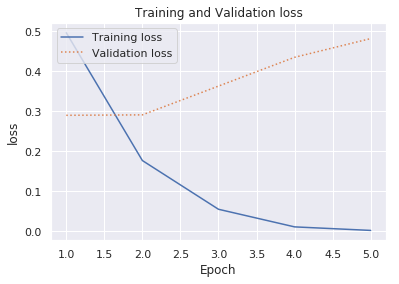

In [10]:
%matplotlib inline

sns.set()
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.plot()

# Evaluate the model 

determine how accurately the model is able to quantify the sentiment expressed in text based on the test data in x_test (reviews) and y_test (0s and 1s, or "labels," indicating which reviews are positive and which are negative)

In [11]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.26%


# EXERCISE 

 input text of your own into the model and see how it performs

In [12]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

this function accepts a string as input and returns a number from 0.0 to 1.0 quantifying the sentiment expressed in that string. The higher the number, the more positive the sentiment. The function cleans the input string, converts it into a list of integers referencing words in the dictionary created by the load_data function, and finally calls the model's predict function to score the text for sentiment

In [13]:
# exmaple 1
analyze('Easily the most stellar experience I have ever had.')

0.97591555

In [14]:
# exaxmple 2
analyze('The long lines and poor customer service really turned me off.')

0.057851493